#Thinkful Data Science Course
##Unit 4: Predicting the Future; 
##Lesson 5: Clustering
###Data Cleaning and Exploration

One of the most common clustering techniques is K-Means Clustering. K-Means is an unsupervised learning technique, meaning that it is a technique for finding patterns in data without prior knowledge of what belongs to what. We have to go find the lables in the data.

The technique is in the name. The "means" refers to the fact that the technique works by computing the mean of some attributes. That mean represents the center of one cluster. "K" is the number of such clusters. The technique effectively computes K number of means and clusters the data around these K-Means.

To illustrate the algorithm, we're going to use the Iris dataset. This is just to illustrate what k-means will try to find in the data---clusters of similarity---and not unsupervised learning. With this dataset, we know what the labels are (species). But when we don't know what the labels are in advance, it is helpful to uncover the clusters that exist. We'll do this in the next assignment with data from the U.N.

Load the Iris dataset and split it out by species.

Plot the sepal length and petal length for each species, and color by species. (We did this in the K-Nearest Neighbors lesson.)

Plot attributes other than sepal length and petal length. Does the dataset cluster for some attributes and not for others? Which ones?

Does domain knowledge, i.e. knowing what flowers are and knowing their characteristics, help in picking the attributes to cluster on?


In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
iris = datasets.load_iris()

In [4]:
iris_df = pd.DataFrame()

In [5]:
iris_df['sepal_length'] = iris.data[:,0]
iris_df['sepal_width'] = iris.data[:,1]
iris_df['petal_length'] = iris.data[:,2]
iris_df['petal_width'] = iris.data[:,3]
iris_df['target'] = iris.target
iris_df['target_flower'] = iris.target
iris_df['target_flower'].replace(0, 'setosa', inplace = True)
iris_df['target_flower'].replace(1, 'versicolor', inplace = True)
iris_df['target_flower'].replace(2, 'virginica', inplace = True)

In [6]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target,target_flower
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


In [7]:
%matplotlib inline

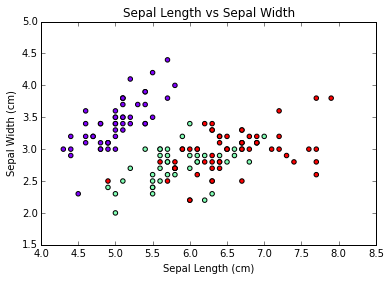

In [8]:
plt.scatter(iris_df['sepal_length'], iris_df['sepal_width'], c = iris_df['target'], cmap=plt.cm.rainbow)
# plt.scatter(iris_df['sepal_length'], iris_df['sepal_width'], c = iris_df['target'], cmap=plt.cm.Set1, label = iris.target_names)
# plt.legend()
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.show()

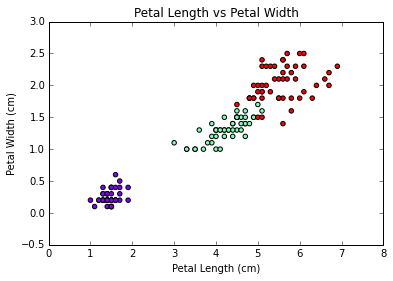

In [9]:
plt.scatter(iris_df['petal_length'], iris_df['petal_width'], c = iris_df['target'], cmap=plt.cm.rainbow)
# plt.scatter(iris_df['sepal_length'], iris_df['sepal_width'], c = iris_df['target'], cmap=plt.cm.Set1, label = iris.target_names)
# plt.legend()
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width')
plt.show()

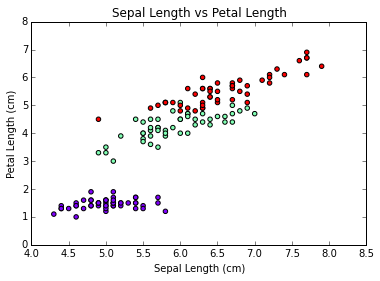

In [10]:
plt.scatter(iris_df['sepal_length'], iris_df['petal_length'], c = iris_df['target'], cmap=plt.cm.rainbow)
# plt.scatter(iris_df['sepal_length'], iris_df['sepal_width'], c = iris_df['target'], cmap=plt.cm.Set1, label = iris.target_names)
# plt.legend()
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Sepal Length vs Petal Length')
plt.show()

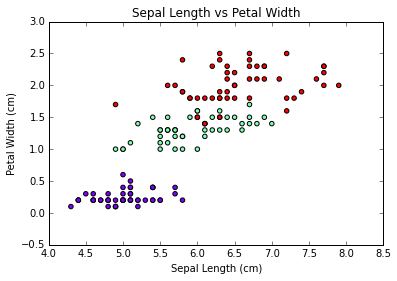

In [11]:
plt.scatter(iris_df['sepal_length'], iris_df['petal_width'], c = iris_df['target'], cmap=plt.cm.rainbow)
# plt.scatter(iris_df['sepal_length'], iris_df['sepal_width'], c = iris_df['target'], cmap=plt.cm.Set1, label = iris.target_names)
# plt.legend()
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Sepal Length vs Petal Width')
plt.show()

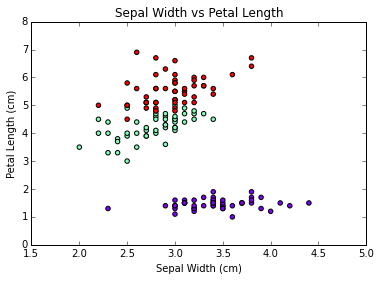

In [13]:
plt.scatter(iris_df['sepal_width'], iris_df['petal_length'], c = iris_df['target'], cmap=plt.cm.rainbow)
# plt.scatter(iris_df['sepal_length'], iris_df['sepal_width'], c = iris_df['target'], cmap=plt.cm.Set1, label = iris.target_names)
# plt.legend()
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Sepal Width vs Petal Length')
plt.show()

####Does the dataset cluster for some attributes and not for others? Which ones?

It seems to cluster pretty good for all of them, except less so for sepal width vs sepal length.

####Does domain knowledge, i.e. knowing what flowers are and knowing their characteristics, help in picking the attributes to cluster on?

No, I would have had a hard time understanding how the attributes would cluster without graphing them.